<a href="https://colab.research.google.com/github/manhungfu/all-project-/blob/master/deepfake_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
import zipfile
from pathlib import Path

In [ ]:
zip_path = 'archive (2).zip'  # It's in the current working directory
extract_path = 'real_and_fake_face'

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Define real/fake paths after extraction
real_path = os.path.join(extract_path, 'real_and_fake_face', 'training_real')
fake_path = os.path.join(extract_path, 'real_and_fake_face', 'training_fake')

# Step 3: Function to load image paths and labels
def load_image_paths_labels(folder_path, label):
    image_paths = []
    labels = []
    for file in os.listdir(folder_path):
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Filter image files
            image_paths.append(os.path.join(folder_path, file))
            labels.append(label)
    return image_paths, labels

# Step 4: Load real and fake image paths
real_image_paths, real_labels = load_image_paths_labels(real_path, 1)
fake_image_paths, fake_labels = load_image_paths_labels(fake_path, 0)

# Step 5: Combine
all_image_paths = real_image_paths + fake_image_paths
all_labels = real_labels + fake_labels

print(f"✅ Loaded {len(all_image_paths)} images (Real: {len(real_image_paths)}, Fake: {len(fake_image_paths)})")


✅ Loaded 2041 images (Real: 1081, Fake: 960)


In [ ]:
real_paths, real_labels = load_image_paths_labels(real_path, 1)
fake_paths, fake_labels = load_image_paths_labels(fake_path, 0)

image_paths = real_paths + fake_paths
labels = real_labels + fake_labels

df = pd.DataFrame({'Paths': image_paths, 'Real':labels})

In [ ]:
df.head()

,Paths,Real
0,real_and_fake_face\real_and_fake_face\training...,1
1,real_and_fake_face\real_and_fake_face\training...,1
2,real_and_fake_face\real_and_fake_face\training...,1
3,real_and_fake_face\real_and_fake_face\training...,1
4,real_and_fake_face\real_and_fake_face\training...,1


In [ ]:
df.shape

(2041, 2)

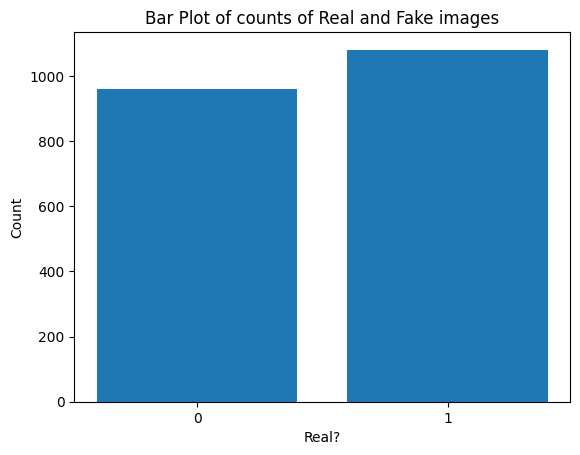

In [ ]:
value_counts = df.value_counts('Real')
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Real?')
plt.ylabel('Count')
plt.title('Bar Plot of counts of Real and Fake images')
plt.xticks([0,1])
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path, target_size=(128, 128), color_mode='rgb'):
    try:
        img = load_img(path, color_mode=color_mode, target_size=target_size)
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize
        return img_array
    except Exception as e:
        print(f"Error loading image {path}: {e}")
        return None

# Apply preprocessing
df['image'] = df['Paths'].apply(preprocess_image)

# Drop rows where preprocessing failed
df = df[df['image'].notnull()].reset_index(drop=True)

print(f"✅ Successfully loaded and processed {len(df)} images.")

✅ Successfully loaded and processed 2041 images.


In [ ]:
df.image[1]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.92156863, 0.7529412 , 0.6901961 ],
        [0.90588236, 0.7254902 , 0.6627451 ],
        [0.89411765, 0

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Real'], random_state = 123)

X_train = np.stack(train_df['image'].values)
y_train = train_df['Real'].values
X_test = np.stack(test_df['image'].values)
y_test = test_df['Real'].values

In [ ]:
def model():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))

    opt = SGD(learning_rate=0.0001, momentum=0.9)


    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model1 = model()

model1.summary()

history = model1.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

C:\Users\acer\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,765,505 (56.33 MB)

 Trainable params: 14,765,505 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 242ms/step - accuracy: 0.4899 - loss: 0.7079 - val_accuracy: 0.5257 - val_loss: 0.6962
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.5356 - loss: 0.6863 - val_accuracy: 0.5526 - val_loss: 0.6891
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.5941 - loss: 0.6760 - val_accuracy: 0.5599 - val_loss: 0.6775
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.6197 - loss: 0.6689 - val_accuracy: 0.5477 - val_loss: 0.6867
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.5657 - loss: 0.6771 - val_accuracy: 0.5648 - val_loss: 0.6716
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.6503 - loss: 0.6532 - val_accuracy: 0.5648 - val_loss: 0.6701
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.6655 - loss: 0.6463 - val_accuracy: 0.5697 - val_loss: 0.6699
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.6437 - loss: 0.6456 - val_accura

In [ ]:
def eval(results, model):

    plt.subplot(211)
    plt.subplots_adjust(hspace=0.4)
    plt.title('Cross Entropy Loss')
    plt.plot(results.history['loss'], color='blue', label='train')
    plt.plot(results.history['val_loss'], color='orange', label='test')
    plt.legend()

    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(results.history['accuracy'], color='blue', label='train')
    plt.plot(results.history['val_accuracy'], color='orange', label='test')
    plt.xlabel('Epoch')
    plt.legend()

    loss, acc = model1.evaluate(X_test, y_test, verbose=0)
    print('Cross Entropy Loss: %.2f' % loss)
    print('Validation Accuracy: %.2f%%' % (acc * 100.0))

Cross Entropy Loss: 0.66
Validation Accuracy: 57.95%


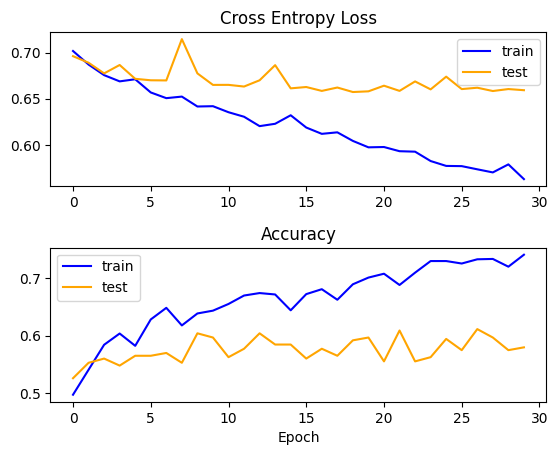

In [ ]:
eval(history, model1)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [ ]:
def model_rof():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))

    opt = SGD(learning_rate=0.0001, momentum=0.9)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model2 = model_rof()

history2 = model2.fit(datagen.flow(X_train, y_train), epochs=50, batch_size=32, validation_data=(X_test, y_test))

C:\Users\acer\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acer\anaconda3\envs\tfenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.5425 - loss: 0.6995 - val_accuracy: 0.5330 - val_loss: 0.7011
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 0.5186 - loss: 0.6933 - val_accuracy: 0.5428 - val_loss: 0.6890
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - accuracy: 0.5154 - loss: 0.6891 - val_accuracy: 0.5575 - val_loss: 0.6832
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - accuracy: 0.5807 - loss: 0.6831 - val_accuracy: 0.5575 - val_loss: 0.6832
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - accuracy: 0.5283 - loss: 0.6892 - val_accuracy: 0.5526 - val_loss: 0.6912
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 241ms/step - accuracy: 0.5515 - loss: 0.6885 - val_accuracy: 0.5550 - val_loss: 0.6828
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 241ms/step - accuracy: 0.5834 - loss: 0.6793 - val_accuracy: 0.5012 - val_loss: 0.7063
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 241ms/step - accuracy: 0.5043 - loss: 0.7049 - val_accu

Cross Entropy Loss: 0.66
Validation Accuracy: 57.95%


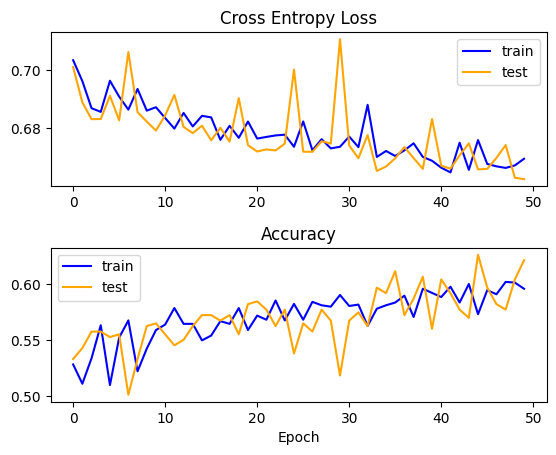

In [ ]:
eval(history2, model2)

In [ ]:
predictions = model2.predict(X_test)

predicted_labels = np.round(predictions).flatten().astype(int)
true_labels = np.round(y_test).flatten().astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [ ]:
predicted_labels

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

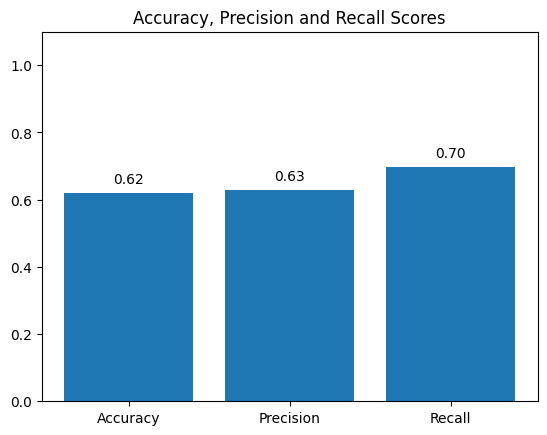

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]


plt.bar(metrics, scores)

for i, score in enumerate(scores):
    plt.text(i, score+0.02, f'{score:.2f}', ha='center', va='bottom', fontsize = 10)

plt.ylim(0,1.1)
plt.title('Accuracy, Precision and Recall Scores')
plt.show()

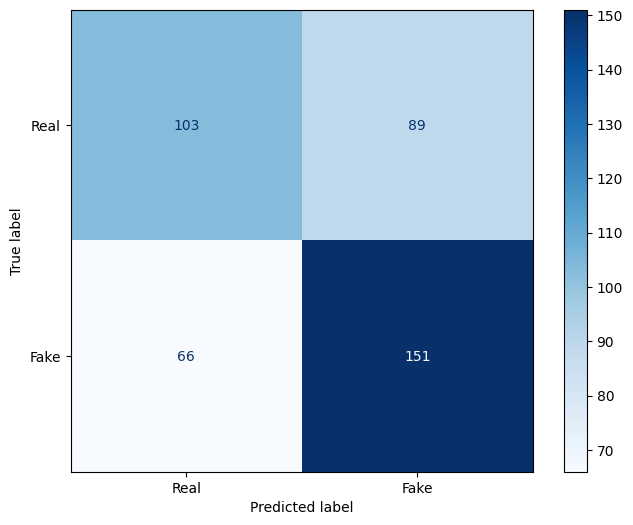

In [ ]:
conf = confusion_matrix(true_labels, predicted_labels)
labels = ['Real', 'Fake']

conf_mat = ConfusionMatrixDisplay(conf, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
conf_mat.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f')
plt.show()

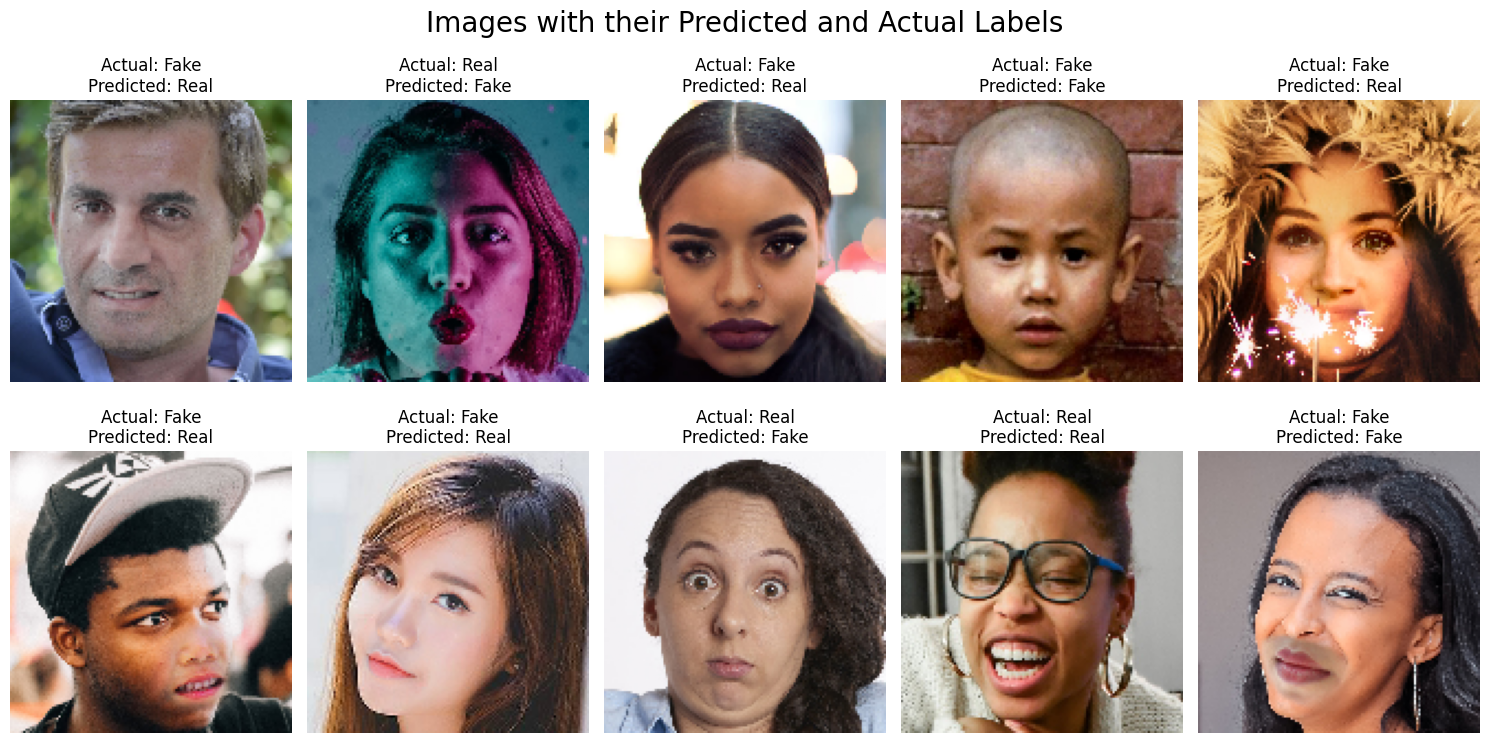

In [ ]:
indices = np.random.choice(len(X_test), 10)

disp_img = X_test[indices]
disp_img_lab = y_test[indices]

fig, axes = plt.subplots(nrows=2, ncols = 5, figsize = (15,8))
fig.suptitle('Images with their Predicted and Actual Labels', fontsize=20)

for i, ax in enumerate(axes.flat):
    ax.imshow(disp_img[i])
    ax.axis('off')

    actual_label = 'Real' if disp_img_lab[i] == 1 else 'Fake'
    predicted_label = 'Real' if predicted_labels[i] == 1 else 'Fake'
    ax.set_title('Actual: ' +actual_label +'\n' + 'Predicted: ' + predicted_label)

plt.tight_layout()
plt.show()
